Simulating paths of Stochastic Processes

In this script I will explore 4 the process of generating paths for four processes

Brownian Motion (Wiener Process): The increments are normally distributed with mean 0 and variance proportional to dt. The cumulative sum of these increments gives a continuous path.

Poisson Process: Represents a jump process where events happen at a rate λ. Here, the increments are the number of events happening in each time step, and the path is built by accumulating events.

Gamma Process: A continuous-time process where the increments are distributed according to the Gamma distribution. The scale is inversely related to the rate parameter λ.

Variance Gamma Process: This combines Brownian motion and a time change using a Gamma process. The time increments (Gamma distributed) distort the base Brownian motion.

In [2]:
#import necessary libraries 
import math
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

Preliminaries: assign the basic parameters

In [3]:
T = 1.0  # Total time period (e.g., 1 year)
nsteps = 250  # Number of steps (e.g., daily steps over a year)
dt = T / nsteps  # Time step size, the size of each time increment
nsimul = 5  # Number of realizations (paths) to generate

# Create an empty array to store the realizations for different processes.
x = np.empty((nsteps, nsimul))  # Placeholder for Brownian motion

Simulating paths of a Brownian motion

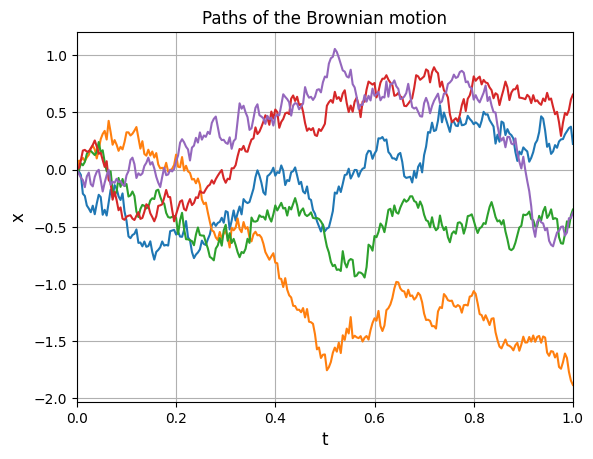

In [4]:
# Generate the increments of the Brownian motion using a normal distribution
dx = norm.rvs(size=x.shape, scale=dt**0.5)  # Standard normal with scaling for dt

# Generate the path of the process. It starts at zero and uses cumulative sums of the increments
x = np.vstack((np.zeros((1, nsimul)), np.cumsum(dx, axis=0)))

# Plot
t = np.linspace(0.0, nsteps * dt, nsteps + 1)  # Time vector from 0 to T, with nsteps+1 points
t = t.reshape(nsteps + 1, 1)  # Reshape to make it compatible for plotting
for k in range(nsimul):  # Loop through each path
    plt.plot(t, x[:, k])  # Plot each path

# Set axis limits and labels for the Brownian motion plot
plt.xlim([0, T])
plt.xlabel('t', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.title('Paths of the Brownian motion')
plt.grid(True)
plt.show()

Simulating paths of a Poisson Process

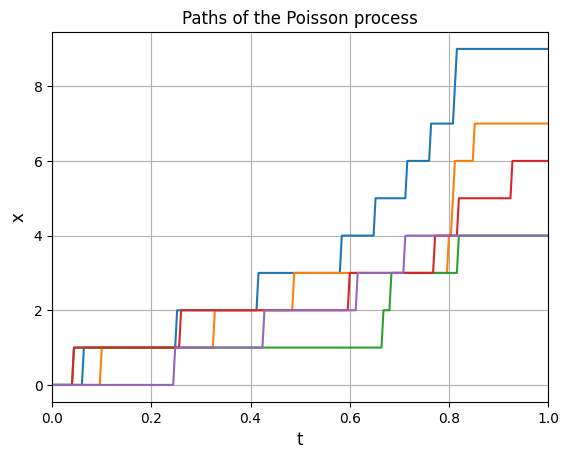

In [5]:
# Assign parameters for Poisson process
lambda_p = 5  # Rate of the Poisson process (average number of events per unit time)
Np = np.empty((nsteps, nsimul))  # Placeholder for Poisson process paths

# Generate the increments of the Poisson process (event counts)
dN = poisson.rvs(lambda_p * dt, size=Np.shape)  # Poisson increments

# Generate the path of the Poisson process using cumulative sums
Np = np.vstack((np.zeros((1, nsimul)), np.cumsum(dN, axis=0)))

# Plotting the Poisson process paths
for k in range(nsimul):  # Loop through each realization (path)
    plt.plot(t, Np[:, k])  # Plot each path

# Set axis limits and labels for the Poisson process plot
plt.xlim([0, T])
plt.xlabel('t', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.title('Paths of the Poisson process')
plt.grid(True)
plt.show()

Simulating paths of a Gamma process

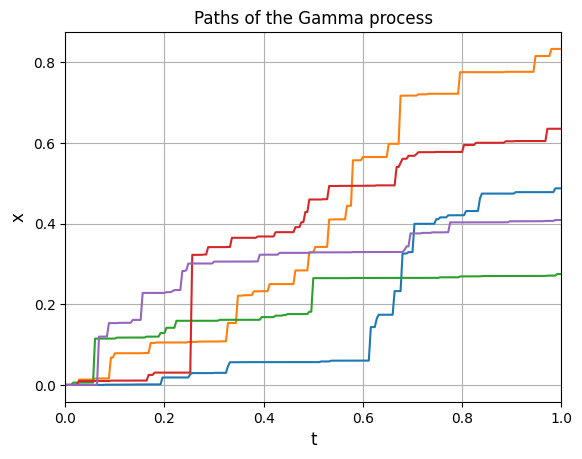

In [6]:
# Assign parameters for the Gamma process
a_g = 5  # Shape parameter (alpha) for the Gamma process
lambda_g = 10  # Rate parameter (lambda) for the Gamma process
Ga = np.empty((nsteps, nsimul))  # Placeholder for Gamma process paths

# Generate the increments of the Gamma process
dg = gamma.rvs(a_g * dt, size=Ga.shape) / lambda_g  # Gamma increments scaled by lambda

# Generate the path of the Gamma process using cumulative sums
Ga = np.vstack((np.zeros((1, nsimul)), np.cumsum(dg, axis=0)))

# Plotting the Gamma process paths
for k in range(nsimul):  # Loop through each realization (path)
    plt.plot(t, Ga[:, k])  # Plot each path

# Set axis limits and labels for the Gamma process plot
plt.xlim([0, T])
plt.xlabel('t', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.title('Paths of the Gamma process')
plt.grid(True)
plt.show()

Simulating paths of a Variance Gamma process

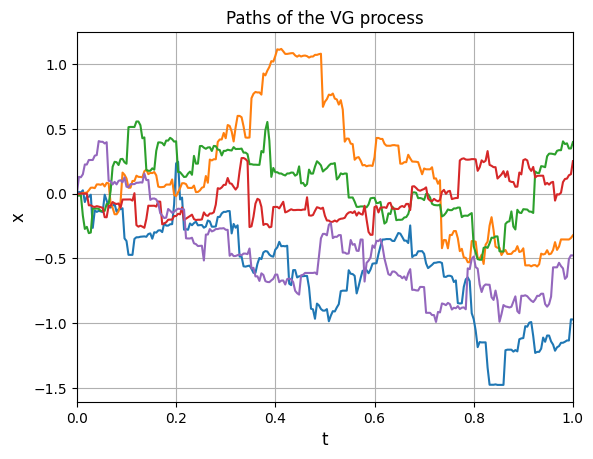

In [8]:
# Assign parameters for the Variance Gamma process
theta = -0.09  # Drift parameter (direction and magnitude of mean drift)
kappa = 0.017  # Variance rate parameter (inverse of the rate of variance growth)
sigma = 0.24  # Volatility parameter
VG = np.empty((nsteps, nsimul))  # Placeholder for Variance Gamma paths

# Generate the increments of the Gamma clock, which controls the time distortion in VG process
dg = gamma.rvs(dt / kappa, size=VG.shape) * kappa  # Gamma increments controlling time

# Generate the increments of the base process (a Brownian motion with a random time change)
dW = norm.rvs(size=VG.shape, scale=np.sqrt(dg))  # Scaled Brownian motion based on Gamma increments

# Generate the path of the Variance Gamma process using cumulative sums
VG = np.vstack((np.zeros((1, nsimul)), np.cumsum(dW, axis=0)))

# Plotting the Variance Gamma process paths
for k in range(nsimul):  # Loop through each realization (path)
    plt.plot(t, VG[:, k])  # Plot each path

# Set axis limits and labels for the Variance Gamma process plot
plt.xlim([0, T])
plt.xlabel('t', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.title('Paths of the VG process')
plt.grid(True)
plt.show()